In [10]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris

In [11]:
boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


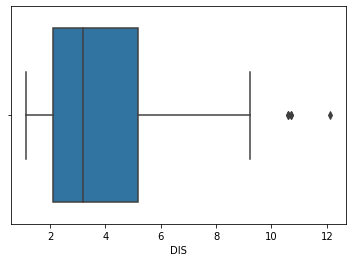

In [12]:
#Outlier detection

import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

In [13]:
Q1 = boston_df['DIS'].quantile(0.25)
Q3 = boston_df['DIS'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)


2.100175
5.1884250000000005
3.0882500000000004


In [14]:
print(boston_df['DIS'] < (Q1 - 1.5 * IQR))

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool


In [15]:
print(boston_df['DIS'] > (Q3 + 1.5 * IQR))


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool


In [17]:
#Equal frequency binning
pd.qcut(boston_df['TAX'], q=4)

0        (279.0, 330.0]
1      (186.999, 279.0]
2      (186.999, 279.0]
3      (186.999, 279.0]
4      (186.999, 279.0]
             ...       
501    (186.999, 279.0]
502    (186.999, 279.0]
503    (186.999, 279.0]
504    (186.999, 279.0]
505    (186.999, 279.0]
Name: TAX, Length: 506, dtype: category
Categories (4, interval[float64]): [(186.999, 279.0] < (279.0, 330.0] < (330.0, 666.0] < (666.0, 711.0]]

In [18]:
#Equal width binning
pd.cut(boston_df['TAX'], bins=4)

0      (186.476, 318.0]
1      (186.476, 318.0]
2      (186.476, 318.0]
3      (186.476, 318.0]
4      (186.476, 318.0]
             ...       
501    (186.476, 318.0]
502    (186.476, 318.0]
503    (186.476, 318.0]
504    (186.476, 318.0]
505    (186.476, 318.0]
Name: TAX, Length: 506, dtype: category
Categories (4, interval[float64]): [(186.476, 318.0] < (318.0, 449.0] < (449.0, 580.0] < (580.0, 711.0]]

In [19]:
# load and see the dataset
from pandas import read_csv
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# see the dataset
print(dataset)

      0    1   2   3    4     5      6   7  8
0     6  148  72  35    0  33.6  0.627  50  1
1     1   85  66  29    0  26.6  0.351  31  0
2     8  183  64   0    0  23.3  0.672  32  1
3     1   89  66  23   94  28.1  0.167  21  0
4     0  137  40  35  168  43.1  2.288  33  1
..   ..  ...  ..  ..  ...   ...    ...  .. ..
763  10  101  76  48  180  32.9  0.171  63  0
764   2  122  70  27    0  36.8  0.340  27  0
765   5  121  72  23  112  26.2  0.245  30  0
766   1  126  60   0    0  30.1  0.349  47  1
767   1   93  70  31    0  30.4  0.315  23  0

[768 rows x 9 columns]


In [20]:
from numpy import nan
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64
      0      1     2     3      4     5      6   7  8
0     6  148.0  72.0  35.0    NaN  33.6  0.627  50  1
1     1   85.0  66.0  29.0    NaN  26.6  0.351  31  0
2     8  183.0  64.0   NaN    NaN  23.3  0.672  32  1
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
764   2  122.0  70.0  27.0    NaN  36.8  0.340  27  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0
766   1  126.0  60.0   NaN    NaN  30.1  0.349  47  1
767   1   93.0  70.0  31.0    NaN  30.4  0.315  23  0

[768 rows x 9 columns]


In [21]:
#Drop all missing values rows
dataset.dropna(inplace=True)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
      0      1     2     3      4     5      6   7  8
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
6     3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
8     2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
13    1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
753   0  181.0  88.0  44.0  510.0  43.3  0.222  26  1
755   1  128.0  88.0  39.0  110.0  36.5  1.057  37  1
760   2   88.0  58.0  26.0   16.0  28.4  0.766  22  0
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0

[392 rows x 9 columns]


In [22]:
#central imputation for missing values
dataset.fillna(dataset.mean(), inplace=True)
# count the number of nan values in each column
print(dataset.isnull().sum())
# see the dataset
print(dataset)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
      0      1     2     3      4     5      6   7  8
3     1   89.0  66.0  23.0   94.0  28.1  0.167  21  0
4     0  137.0  40.0  35.0  168.0  43.1  2.288  33  1
6     3   78.0  50.0  32.0   88.0  31.0  0.248  26  1
8     2  197.0  70.0  45.0  543.0  30.5  0.158  53  1
13    1  189.0  60.0  23.0  846.0  30.1  0.398  59  1
..   ..    ...   ...   ...    ...   ...    ...  .. ..
753   0  181.0  88.0  44.0  510.0  43.3  0.222  26  1
755   1  128.0  88.0  39.0  110.0  36.5  1.057  37  1
760   2   88.0  58.0  26.0   16.0  28.4  0.766  22  0
763  10  101.0  76.0  48.0  180.0  32.9  0.171  63  0
765   5  121.0  72.0  23.0  112.0  26.2  0.245  30  0

[392 rows x 9 columns]


In [29]:
#https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer
from numpy import isnan
# retrieve the numpy array
values = dataset.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())
transformed_values
col_names = list(dataset.columns)
newdf = pd.DataFrame(transformed_values, columns=col_names)
newdf

Missing: 0
Missing: 0


,0,1,2,3,4,5,6,7,8
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
1,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
2,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
3,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
4,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0
...,...,...,...,...,...,...,...,...,...
387,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26.0,1.0
388,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,1.0
389,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,0.0
390,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0


In [30]:
#Feature Scaling

#Standard Scaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit_transform(dataset)
col_names = list(dataset.columns)
newdf = pd.DataFrame(scaler.fit_transform(dataset), columns=col_names)
newdf

,0,1,2,3,4,5,6,7,8
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299,-0.704403
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585,1.419642
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514,1.419642
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726,1.419642
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668,1.419642
...,...,...,...,...,...,...,...,...,...
387,-1.029213,1.893894,1.389146,1.414319,2.982087,1.455225,-0.872478,-0.477514,1.419642
388,-0.717427,0.174309,1.389146,0.938264,-0.388037,0.486384,1.547482,0.602213,1.419642
389,-0.405640,-1.123491,-1.014673,-0.299477,-1.180016,-0.667678,0.704119,-0.870142,-0.704403
390,2.088650,-0.701706,0.427618,1.795162,0.201735,-0.026533,-1.020284,3.154296,-0.704403


In [82]:
#Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(dataset)

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.        ]])

In [31]:
#Normalizer
from sklearn.preprocessing import Normalizer

n_scaler = Normalizer()
n_scaler.fit_transform(newdf)

array([[-0.30692707, -0.46676766, -0.15985578, ..., -0.44145396,
        -0.41425456, -0.30135528],
       [-0.16719487,  0.07575239, -0.39913209, ...,  0.83094606,
         0.03404698,  0.23061989],
       [-0.03274238, -0.50513585, -0.57761279, ..., -0.27808927,
        -0.16658789,  0.49526354],
       ...,
       [-0.16379155, -0.45364902, -0.40971005, ...,  0.28431272,
        -0.35135053, -0.28442743],
       [ 0.46952594, -0.15774263,  0.09612803, ..., -0.22935855,
         0.70908202, -0.15834889],
       [ 0.31158077, -0.03106046,  0.06300155, ..., -0.47398401,
        -0.04992989, -0.41433018]])